In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [2]:
conn=sqlite3.connect('inventory.db')

In [3]:
conn

In [4]:
df=pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,PurchasePrice,Description,ActualPrice,Volume,totalpurchaseQuantity,totalpurchaseDollars,totalsalesquantity,totalsalesdollars,totalsalesprice,totalsalesExciseTax,SumFreight,Grossprofit,Profitmargin,StockTurnOver,Sales_to_purchase_ratio
0,1128,BROWN-FORMAN CORP,1233,26.27,Jack Daniels No 7 Black,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,1.338647,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,23.19,Tito's Handmade Vodka,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,1.266830,1.266830
2,17035,PERNOD RICARD USA,8068,18.24,Absolut 80 Proof,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,1.327594,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,16.17,Capt Morgan Spiced Rum,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,1.372493,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,21.89,Ketel One Vodka,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,1.396897,1.396897


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
totalpurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
totalpurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
totalsalesquantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
totalsalesdollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
totalsalesprice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


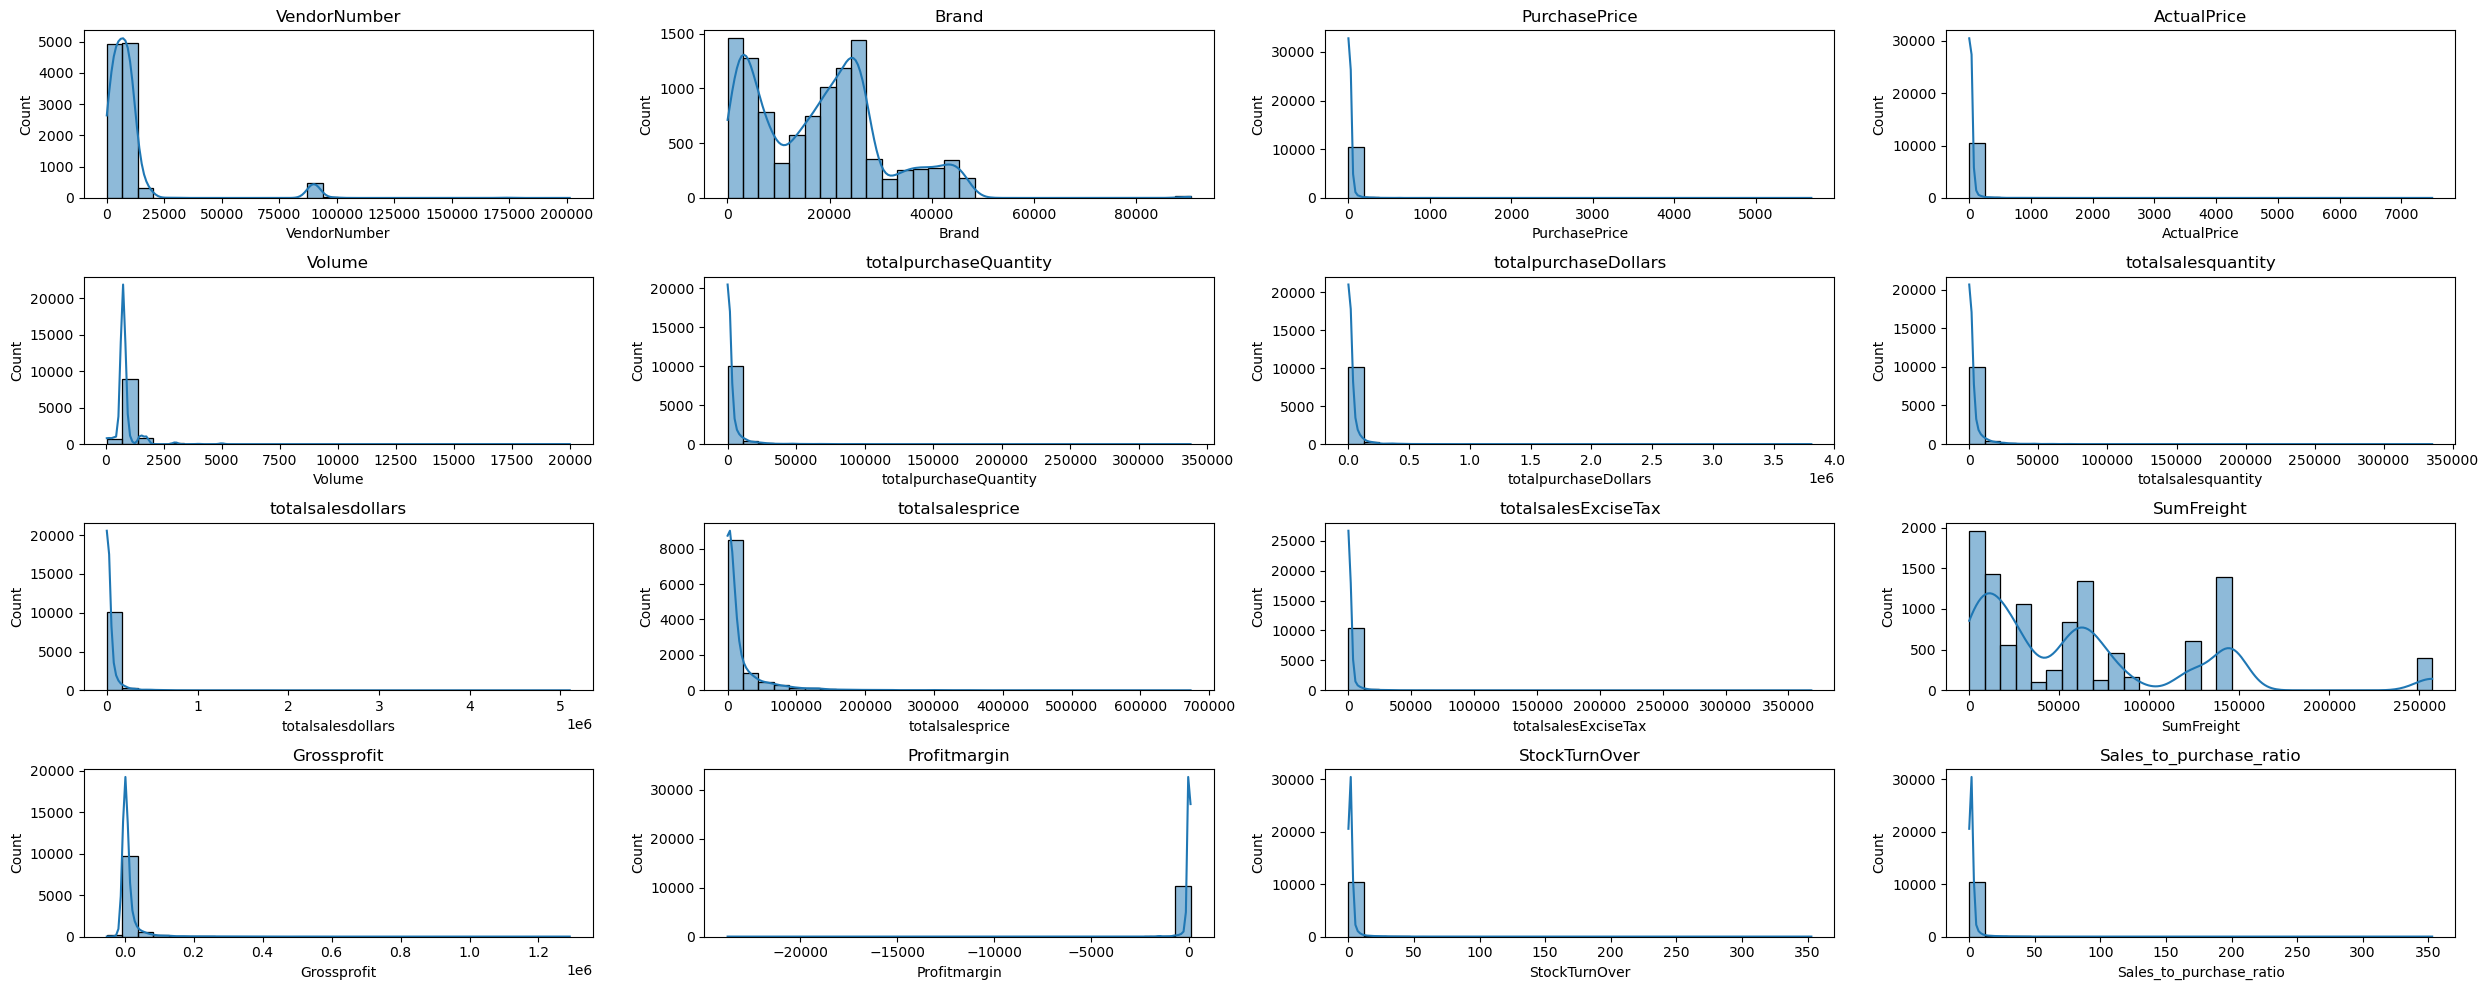

In [6]:
#distribution plots of numerical columns
numerical_cols=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(25,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()


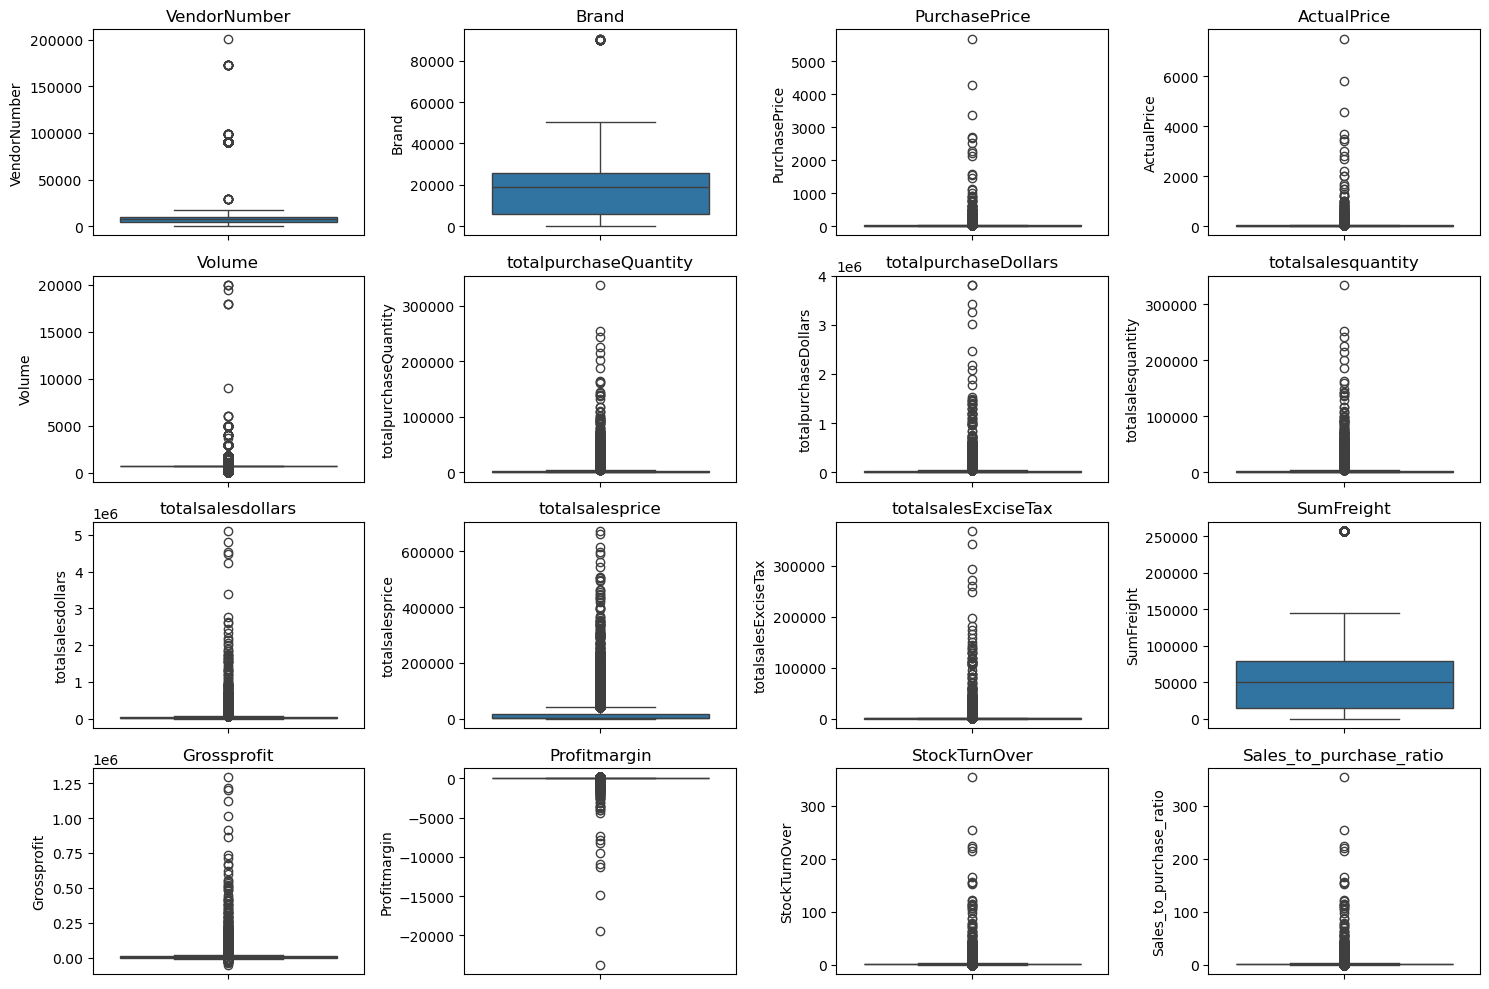

In [7]:
plt.figure(figsize=(15,10))
for i ,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [8]:
#filtter the data inconsistency
df=pd.read_sql(""" select * 
from vendor_sales_summary
where Grossprofit>0 
and Profitmargin>0
and totalsalesquantity>0""",conn)


In [9]:
df

,VendorNumber,VendorName,Brand,PurchasePrice,Description,ActualPrice,Volume,totalpurchaseQuantity,totalpurchaseDollars,totalsalesquantity,totalsalesdollars,totalsalesprice,totalsalesExciseTax,SumFreight,Grossprofit,Profitmargin,StockTurnOver,Sales_to_purchase_ratio
0,1128,BROWN-FORMAN CORP,1233,26.27,Jack Daniels No 7 Black,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,1.338647,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,23.19,Tito's Handmade Vodka,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,1.266830,1.266830
2,17035,PERNOD RICARD USA,8068,18.24,Absolut 80 Proof,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,1.327594,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,16.17,Capt Morgan Spiced Rum,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,1.372493,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,21.89,Ketel One Vodka,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,1.396897,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,1.32,Concannon Glen Ellen Wh Zin,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,6.041667,6.041667
8560,8004,SAZERAC CO INC,5683,0.39,Dr McGillicuddy's Apple Pie,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,28.059829,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,0.74,Deep Eddy Vodka,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.337838,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,1.47,The Club Strawbry Margarita,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,97.469388,97.469388


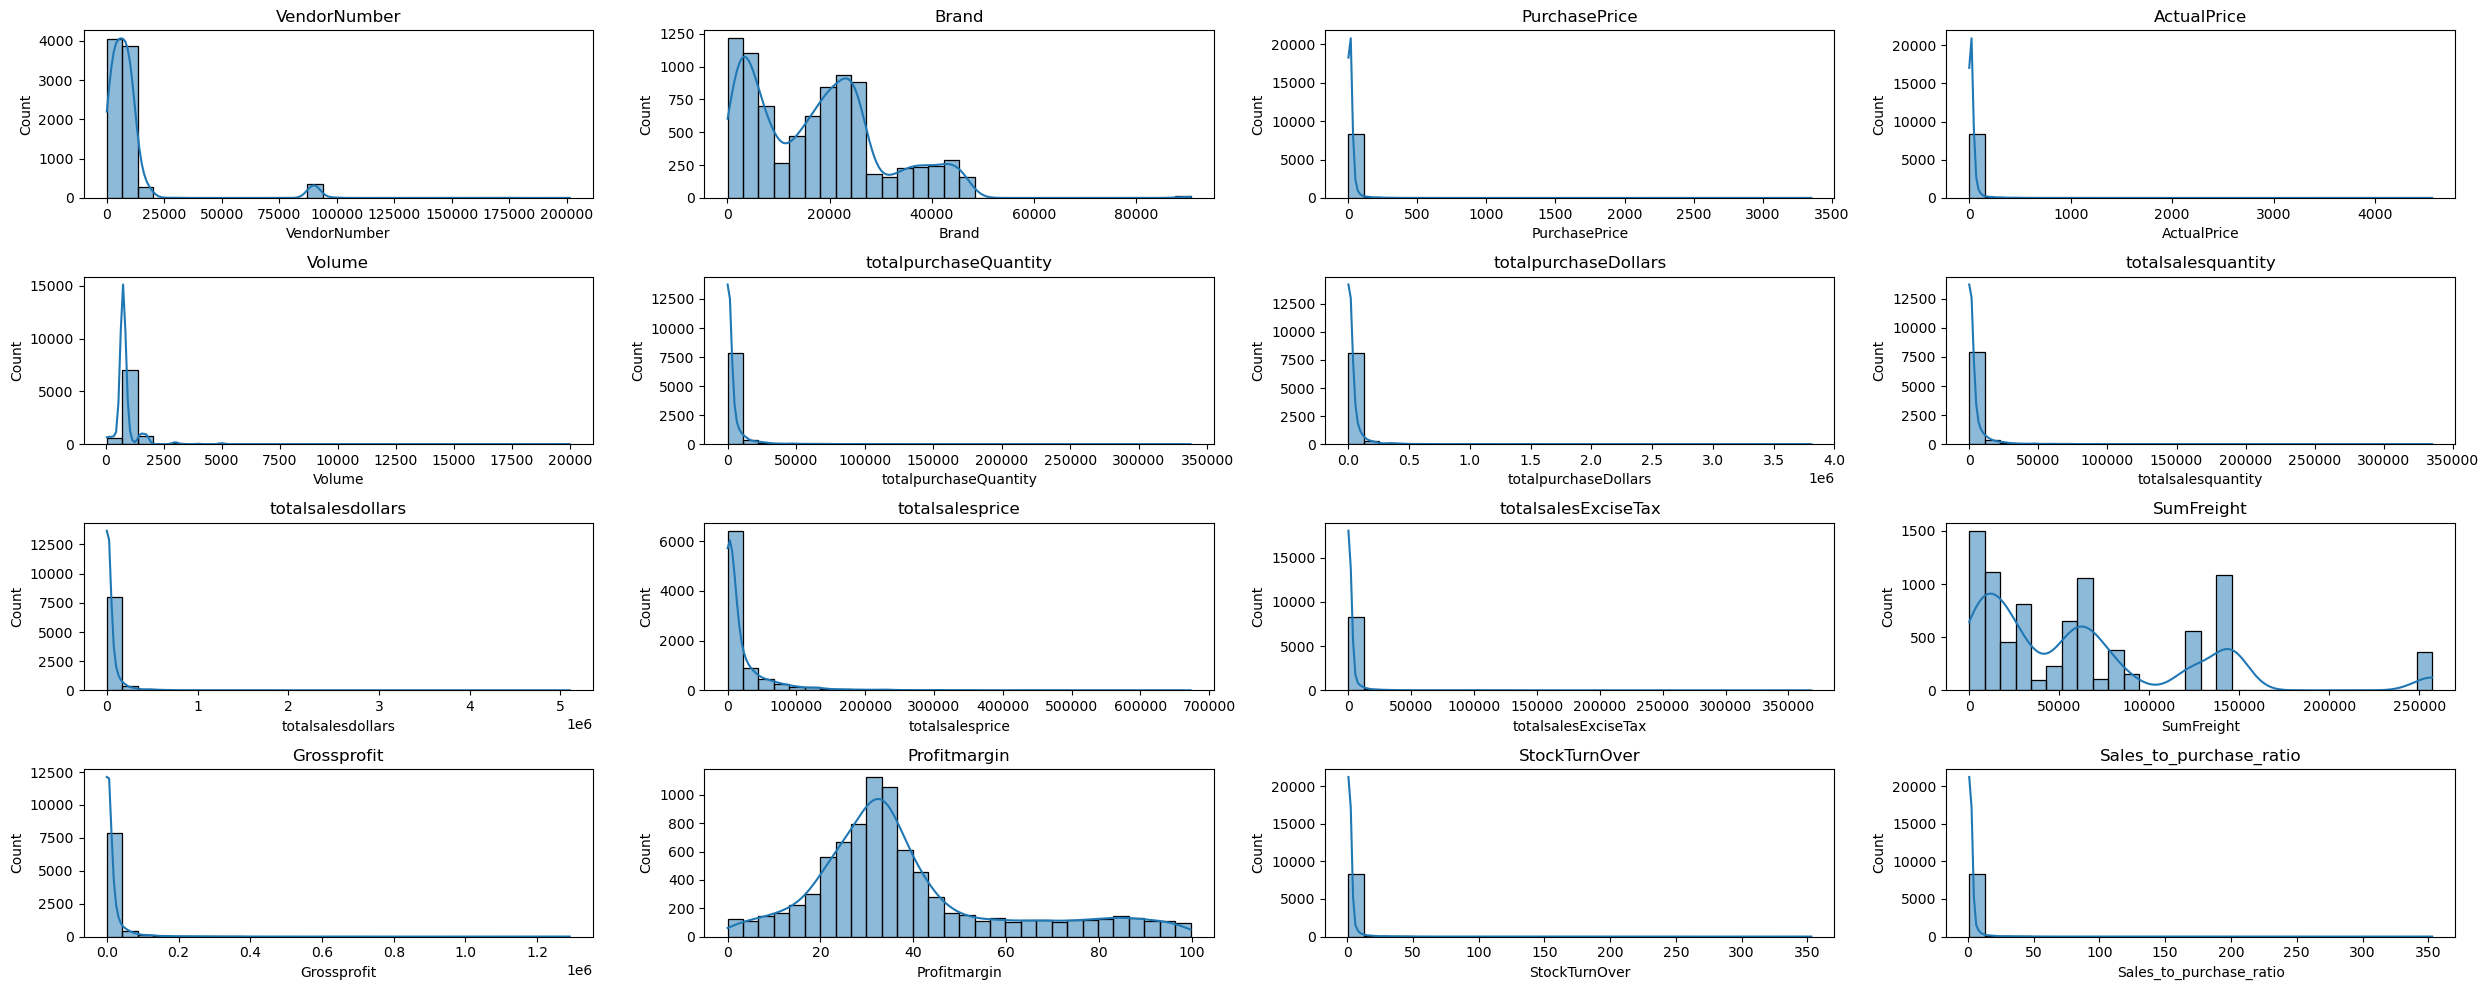

In [10]:
numerical_cols=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(25,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

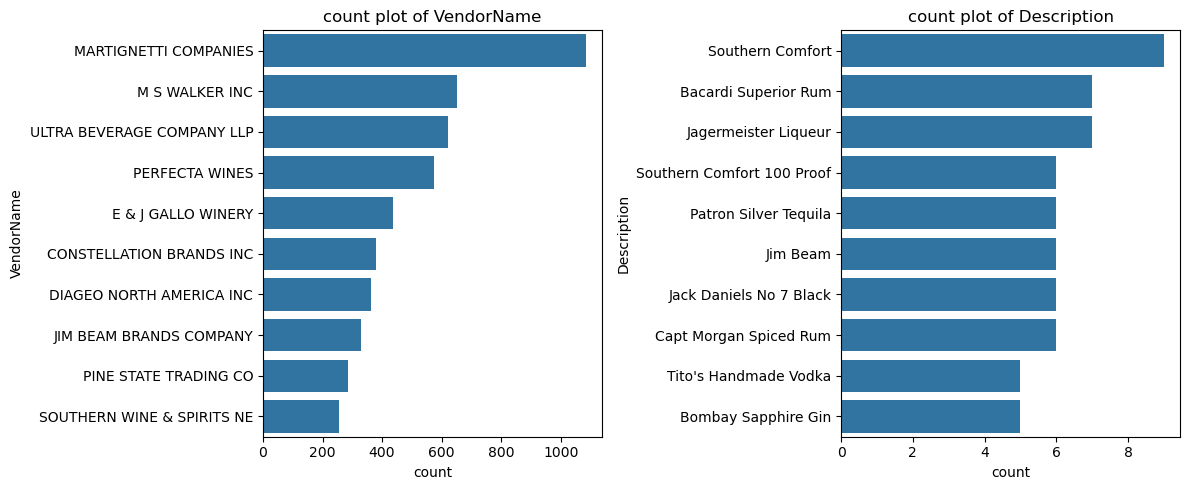

In [11]:
#counts plot for categorical columns
categorical_cols=["VendorName","Description"]

plt.figure(figsize=(12,5))
for i ,col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10])
    plt.title(f"count plot of {col}")
plt.tight_layout()
plt.show()

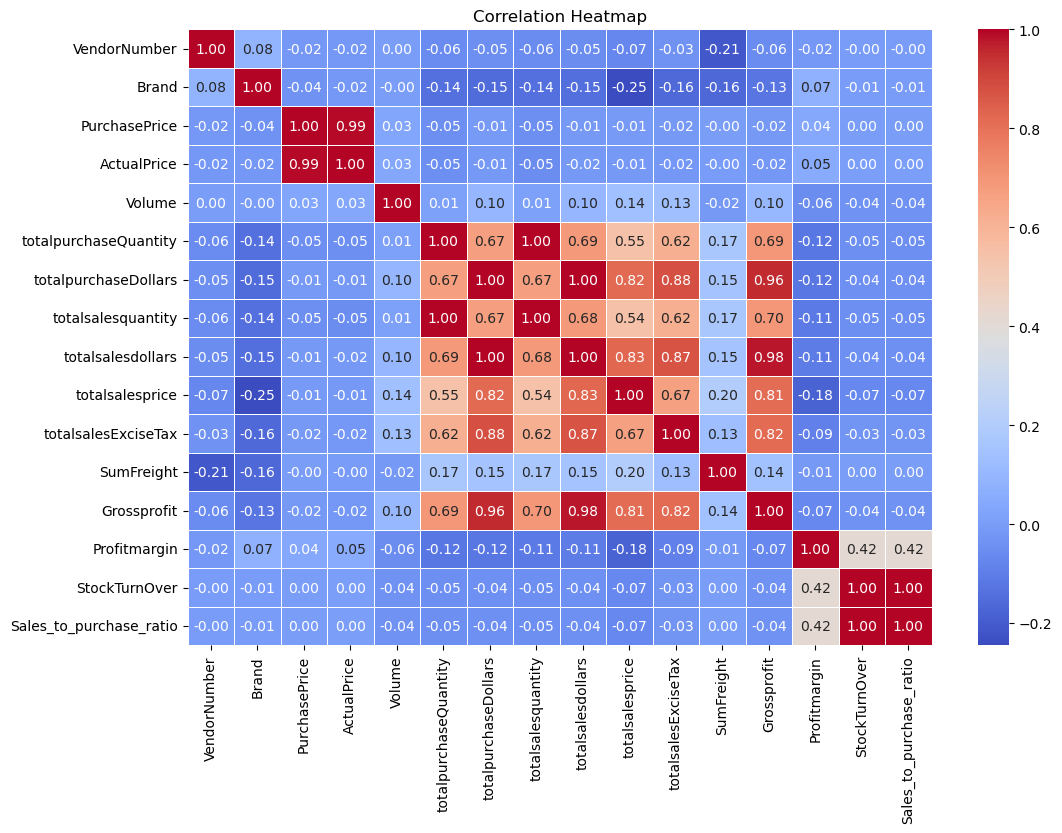

In [12]:
plt.figure(figsize=(12,8))
correlation_matrix=df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidth=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [13]:
df

,VendorNumber,VendorName,Brand,PurchasePrice,Description,ActualPrice,Volume,totalpurchaseQuantity,totalpurchaseDollars,totalsalesquantity,totalsalesdollars,totalsalesprice,totalsalesExciseTax,SumFreight,Grossprofit,Profitmargin,StockTurnOver,Sales_to_purchase_ratio
0,1128,BROWN-FORMAN CORP,1233,26.27,Jack Daniels No 7 Black,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,1.338647,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,23.19,Tito's Handmade Vodka,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,1.266830,1.266830
2,17035,PERNOD RICARD USA,8068,18.24,Absolut 80 Proof,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,1.327594,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,16.17,Capt Morgan Spiced Rum,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,1.372493,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,21.89,Ketel One Vodka,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,1.396897,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,1.32,Concannon Glen Ellen Wh Zin,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,6.041667,6.041667
8560,8004,SAZERAC CO INC,5683,0.39,Dr McGillicuddy's Apple Pie,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,28.059829,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,0.74,Deep Eddy Vodka,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.337838,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,1.47,The Club Strawbry Margarita,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,97.469388,97.469388


In [14]:
#identitfy brands that need promotional or pricing adjustment which exhibits lower sales performance but higher profit margin
brand_performance=df.groupby ('Description').agg({'totalsalesdollars':'sum',
                                                  'Profitmargin':'mean'}).reset_index()

In [15]:
brand_performance

,Description,totalsalesdollars,Profitmargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [16]:
low_sales_threshold=brand_performance['totalsalesdollars'].quantile(0.15)
high_margin_threshold=brand_performance['Profitmargin'].quantile(0.85)

In [17]:
low_sales_threshold

560.299

In [18]:
high_margin_threshold

64.97017552750113

In [19]:
#filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['totalsalesdollars']<=low_sales_threshold) &
    (brand_performance['Profitmargin']>=high_margin_threshold)
]
print("Brands with low sales but high profit margins:")
display(target_brands.sort_values('totalsalesdollars'))

Brands with low sales but high profit margins:


,Description,totalsalesdollars,Profitmargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [20]:
#for better visulization
brand_performance= brand_performance[brand_performance['totalsalesdollars']<1000]

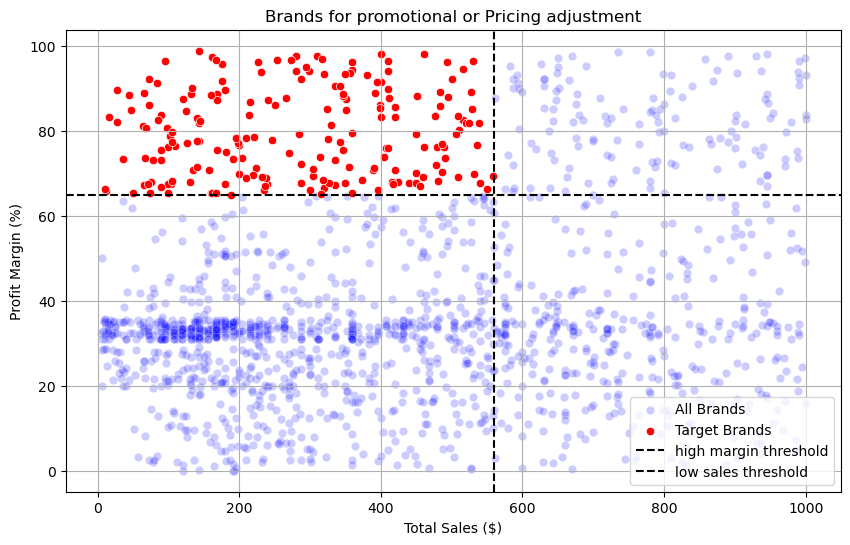

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance,x='totalsalesdollars',y='Profitmargin',color='Blue',label='All Brands',alpha=0.2)
sns.scatterplot(data=target_brands,x='totalsalesdollars',y='Profitmargin',color='red',label='Target Brands')

plt.axhline(high_margin_threshold,linestyle='--',color='Black',label='high margin threshold')
plt.axvline(low_sales_threshold,linestyle='--',color='Black',label='low sales threshold')

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for promotional or Pricing adjustment")
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# which vendors and brands demostrate the highest sales performance ?
top_vendors=df.groupby('VendorName')['totalsalesdollars'].sum().nlargest(10)
top_brands=df.groupby ('Description')['totalsalesdollars'].sum().nlargest(10)

In [23]:
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: totalsalesdollars, dtype: float64

In [24]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: totalsalesdollars, dtype: float64

In [25]:
#helper function to format number
def format_dollars(value):
    if value>=1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value>=1_000:
        return f"{value/1_000:.2f}K"
    else :
        return str(value)

In [26]:
top_brands.apply(lambda x: format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: totalsalesdollars, dtype: object

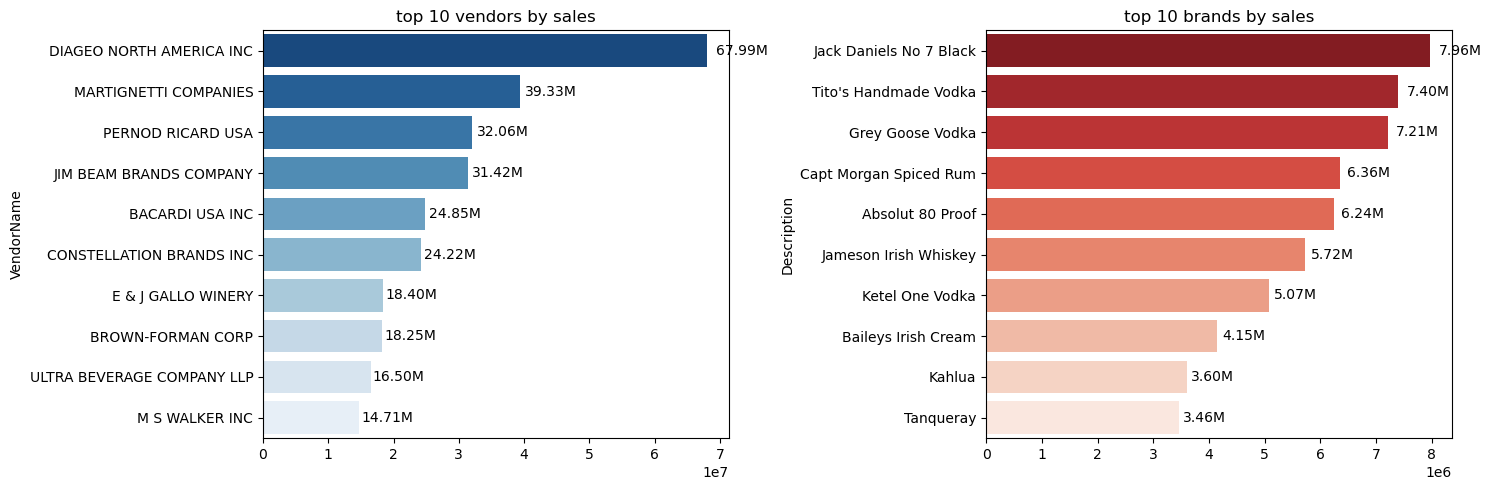

In [27]:
plt.figure(figsize=(15,5))

#plot for top vendors
plt.subplot(1,2,1)
ax1=sns.barplot(y=top_vendors.index,x=top_vendors.values,palette="Blues_r")
plt.title("top 10 vendors by sales")  

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
              bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha='left',va='center',fontsize=10,color='Black')

#plot for top brands
plt.subplot(1,2,2)
ax2=sns.barplot (y=top_brands.index.astype(str),x=top_brands.values,palette="Reds_r")
plt.title("top 10 brands by sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width()*0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha='left',va='center',fontsize=10,color="black")

plt.tight_layout()
plt.show()

In [28]:
df

,VendorNumber,VendorName,Brand,PurchasePrice,Description,ActualPrice,Volume,totalpurchaseQuantity,totalpurchaseDollars,totalsalesquantity,totalsalesdollars,totalsalesprice,totalsalesExciseTax,SumFreight,Grossprofit,Profitmargin,StockTurnOver,Sales_to_purchase_ratio
0,1128,BROWN-FORMAN CORP,1233,26.27,Jack Daniels No 7 Black,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,1.338647,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,23.19,Tito's Handmade Vodka,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,1.266830,1.266830
2,17035,PERNOD RICARD USA,8068,18.24,Absolut 80 Proof,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,1.327594,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,16.17,Capt Morgan Spiced Rum,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,1.372493,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,21.89,Ketel One Vodka,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,1.396897,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,1.32,Concannon Glen Ellen Wh Zin,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,6.041667,6.041667
8560,8004,SAZERAC CO INC,5683,0.39,Dr McGillicuddy's Apple Pie,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,28.059829,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,0.74,Deep Eddy Vodka,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.337838,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,1.47,The Club Strawbry Margarita,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,97.469388,97.469388


In [29]:
#which vendors contribute the most to total purchase dollars
vendors_performance=df.groupby('VendorName').agg({
    'totalpurchaseDollars':'sum',
    'Grossprofit':'sum',
    'totalsalesdollars':'sum'}).reset_index()

In [30]:
vendors_performance

,VendorName,totalpurchaseDollars,Grossprofit,totalsalesdollars
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53
...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28


In [31]:
#contribution of each vendor
vendors_performance['Purchasecontribution%']=vendors_performance['totalpurchaseDollars']/vendors_performance['totalpurchaseDollars'].sum() *100

In [32]:
vendors_performance=round(vendors_performance.sort_values('Purchasecontribution%',ascending=False),2)

In [33]:
# display top vendors
top_vendors = vendors_performance.head(10)
top_vendors['totalsalesdollars'] = top_vendors['totalsalesdollars'].apply(format_dollars)
top_vendors['totalpurchaseDollars'] = top_vendors['totalpurchaseDollars'].apply(format_dollars)
top_vendors['Grossprofit'] = top_vendors['Grossprofit'].apply(format_dollars)
top_vendors

,VendorName,totalpurchaseDollars,Grossprofit,totalsalesdollars,Purchasecontribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [34]:
top_vendors.shape

(10, 5)

In [35]:
vendors_performance.shape

(119, 5)

In [36]:
vendors_performance['Purchasecontribution%'].sum()

99.99

In [37]:
top_vendors['Cummalative_Contribution']=top_vendors['Purchasecontribution%'].cumsum()
top_vendors

,VendorName,totalpurchaseDollars,Grossprofit,totalsalesdollars,Purchasecontribution%,Cummalative_Contribution
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


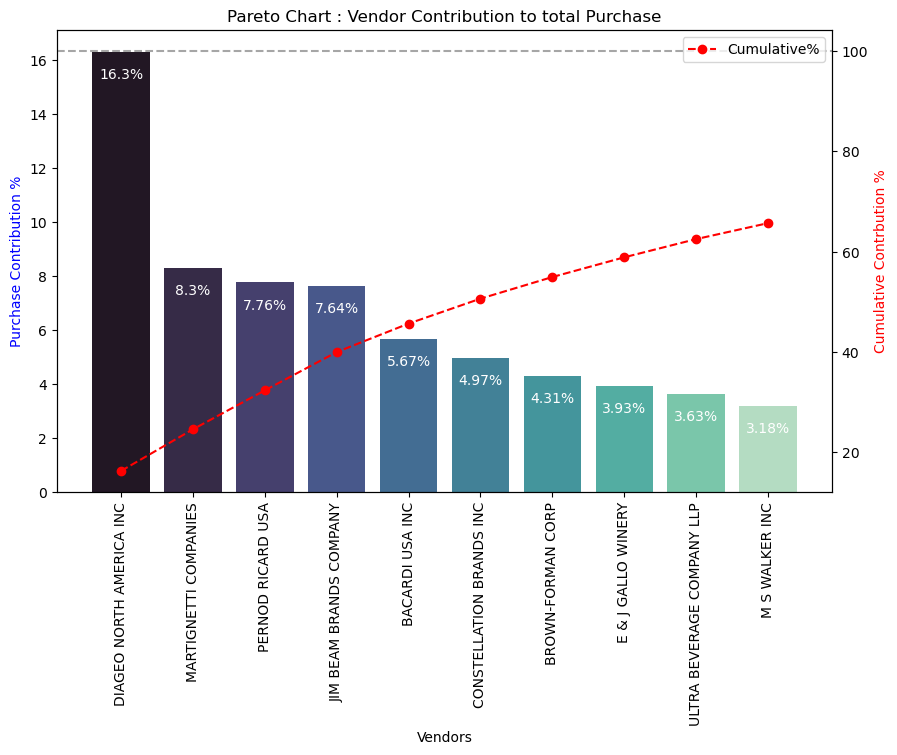

In [38]:
fig,ax1=plt.subplots(figsize=(10,6))

#Bar plot for purchase contribution
sns.barplot(x=top_vendors['VendorName'],y=top_vendors['Purchasecontribution%'],palette='mako',ax=ax1)

for i ,value in enumerate (top_vendors['Purchasecontribution%']):
    ax1.text(i,value-1,str(value)+'%',ha='center',fontsize=10,color='white')

#line plot for cummalative contribution%
ax2=ax1.twinx()
ax2.plot(top_vendors['VendorName'],top_vendors['Cummalative_Contribution'],color='red',marker='o',linestyle='dashed',label='Cumulative%')

ax1.set_xticklabels(top_vendors['VendorName'],rotation=90)
ax1.set_ylabel('Purchase Contribution %',color='blue')
ax2.set_ylabel('Cumulative Contrbution %',color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart : Vendor Contribution to total Purchase')

ax2.axhline(y=100,color='gray',linestyle='dashed',alpha=0.7)
ax2.legend(loc='upper right')

plt.show()











In [89]:
#How much total procurrement depend on top vendors
print(f"Total contribution of top 10 vendors is {round(top_vendors['Purchasecontribution%'].sum(),2)} %")

Total contribution of top 10 vendors is 65.69 %


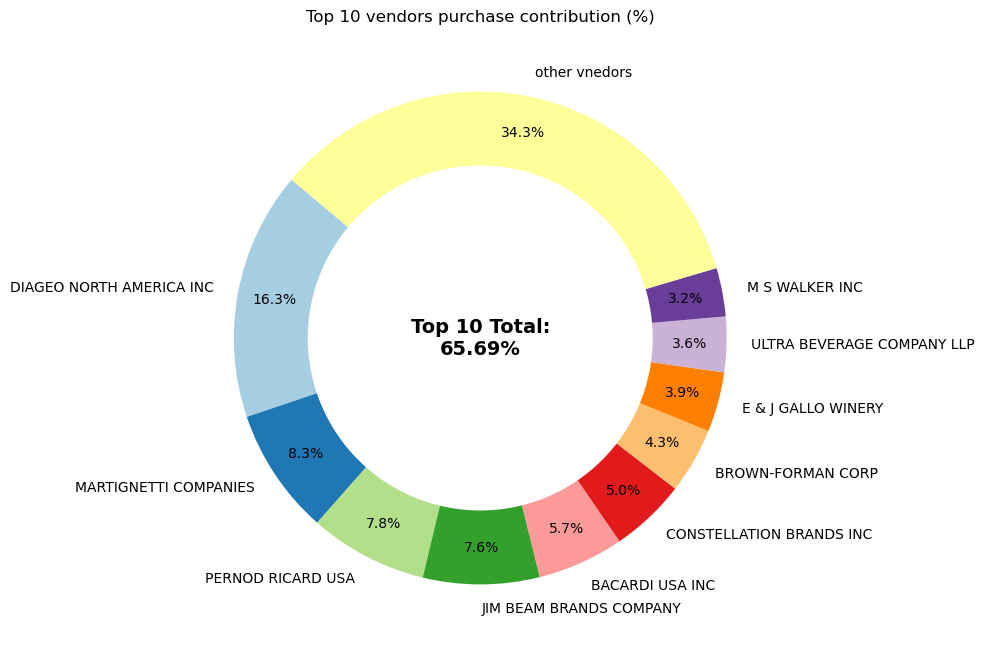

In [125]:
#Taking vendor names and their contribution percentages from your DataFrame and storing them into two lists

vendors = list(top_vendors['VendorName'].values)
purchase_contribution=list(top_vendors['Purchasecontribution%'].values)
total_contribution=sum(purchase_contribution)
remaining_contribution =100 - total_contribution

#Add a new category “Other Vendors” with their contribution % into the lists.
#So the pie chart now shows top 10 vendors + “Other Vendors
vendors.append("other vnedors")
purchase_contribution.append(remaining_contribution)

#donut chart
fig,ax=plt.subplots(figsize=(8,8))
wedges,texts,autotexts=ax.pie(purchase_contribution,labels=vendors,autopct='%1.1f%%',

                             startangle=140,pctdistance=0.85,colors=plt.cm.Paired.colors)

 # draw a white circle in the centre to create a donut chart effect
centre_circle=plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

#add contribution text annotation in the centre
plt.text(0,0,f"Top 10 Total:\n{total_contribution:.2f}%",fontsize=14,fontweight='bold',ha='center',va='center')

plt.title("Top 10 vendors purchase contribution (%)")
plt.show()

In [129]:
df

,VendorNumber,VendorName,Brand,PurchasePrice,Description,ActualPrice,Volume,totalpurchaseQuantity,totalpurchaseDollars,totalsalesquantity,totalsalesdollars,totalsalesprice,totalsalesExciseTax,SumFreight,Grossprofit,Profitmargin,StockTurnOver,Sales_to_purchase_ratio
0,1128,BROWN-FORMAN CORP,1233,26.27,Jack Daniels No 7 Black,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,1.338647,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,23.19,Tito's Handmade Vodka,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,1.266830,1.266830
2,17035,PERNOD RICARD USA,8068,18.24,Absolut 80 Proof,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,1.327594,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,16.17,Capt Morgan Spiced Rum,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,1.372493,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,21.89,Ketel One Vodka,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,1.396897,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,1.32,Concannon Glen Ellen Wh Zin,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,6.041667,6.041667
8560,8004,SAZERAC CO INC,5683,0.39,Dr McGillicuddy's Apple Pie,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,28.059829,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,0.74,Deep Eddy Vodka,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.337838,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,1.47,The Club Strawbry Margarita,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,97.469388,97.469388


In [133]:
#Does purchase  in bulk reduce the unit price , and what is the optimal purchase  volume for cost savings ?

#single unit price 
df['UnitPurchasePrice'] = df['totalpurchaseDollars']/df['totalpurchaseQuantity']

In [139]:
df

,VendorNumber,VendorName,Brand,PurchasePrice,Description,ActualPrice,Volume,totalpurchaseQuantity,totalpurchaseDollars,totalsalesquantity,totalsalesdollars,totalsalesprice,totalsalesExciseTax,SumFreight,Grossprofit,Profitmargin,StockTurnOver,Sales_to_purchase_ratio,UnitPurchasePrice
0,1128,BROWN-FORMAN CORP,1233,26.27,Jack Daniels No 7 Black,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,1.338647,1.338647,26.27
1,4425,MARTIGNETTI COMPANIES,3405,23.19,Tito's Handmade Vodka,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,1.266830,1.266830,23.19
2,17035,PERNOD RICARD USA,8068,18.24,Absolut 80 Proof,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,1.327594,1.327594,18.24
3,3960,DIAGEO NORTH AMERICA INC,4261,16.17,Capt Morgan Spiced Rum,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,1.372493,1.372493,16.17
4,3960,DIAGEO NORTH AMERICA INC,3545,21.89,Ketel One Vodka,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,1.396897,1.396897,21.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,1.32,Concannon Glen Ellen Wh Zin,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,6.041667,6.041667,1.32
8560,8004,SAZERAC CO INC,5683,0.39,Dr McGillicuddy's Apple Pie,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,28.059829,28.059829,0.39
8561,3924,HEAVEN HILL DISTILLERIES,9123,0.74,Deep Eddy Vodka,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.337838,1.337838,0.74
8562,3960,DIAGEO NORTH AMERICA INC,6127,1.47,The Club Strawbry Margarita,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,97.469388,97.469388,1.47


In [141]:
#total purchase quantity divide into 3 parts
df['OrderSize'] = pd.qcut(df['totalpurchaseQuantity'],q=3,labels=['Small','Medium','Large'])

In [149]:
df[['OrderSize','totalpurchaseQuantity']] 

,OrderSize,totalpurchaseQuantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
8559,Small,2
8560,Small,6
8561,Small,2
8562,Small,1


In [153]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


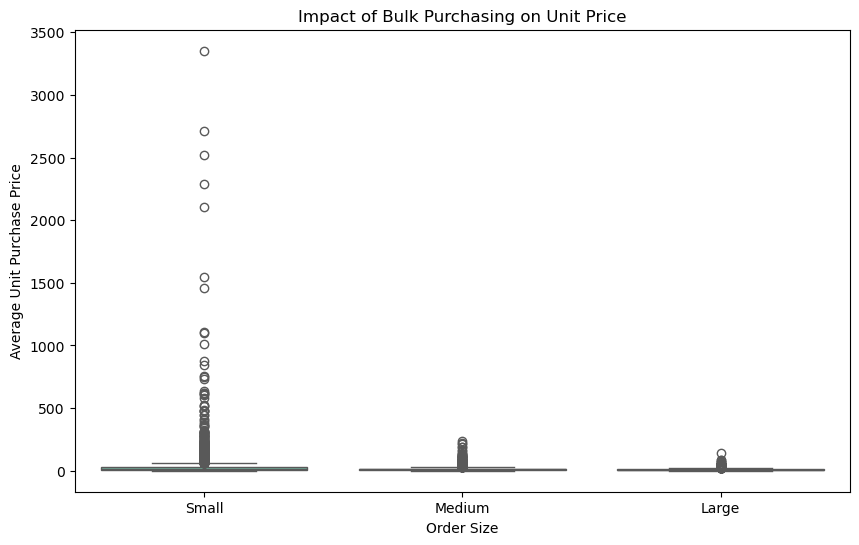

In [155]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='OrderSize',y='UnitPurchasePrice',palette='Set2')
plt.title('Impact of Bulk Purchasing on Unit Price')
plt.xlabel('Order Size')
plt.ylabel('Average Unit Purchase Price')
plt.show()

In [167]:
df

,VendorNumber,VendorName,Brand,PurchasePrice,Description,ActualPrice,Volume,totalpurchaseQuantity,totalpurchaseDollars,totalsalesquantity,totalsalesdollars,totalsalesprice,totalsalesExciseTax,SumFreight,Grossprofit,Profitmargin,StockTurnOver,Sales_to_purchase_ratio,UnitPurchasePrice,OrderSize
0,1128,BROWN-FORMAN CORP,1233,26.27,Jack Daniels No 7 Black,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,1.338647,1.338647,26.27,Large
1,4425,MARTIGNETTI COMPANIES,3405,23.19,Tito's Handmade Vodka,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,1.266830,1.266830,23.19,Large
2,17035,PERNOD RICARD USA,8068,18.24,Absolut 80 Proof,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,1.327594,1.327594,18.24,Large
3,3960,DIAGEO NORTH AMERICA INC,4261,16.17,Capt Morgan Spiced Rum,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,1.372493,1.372493,16.17,Large
4,3960,DIAGEO NORTH AMERICA INC,3545,21.89,Ketel One Vodka,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,1.396897,1.396897,21.89,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,1.32,Concannon Glen Ellen Wh Zin,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,6.041667,6.041667,1.32,Small
8560,8004,SAZERAC CO INC,5683,0.39,Dr McGillicuddy's Apple Pie,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,28.059829,28.059829,0.39,Small
8561,3924,HEAVEN HILL DISTILLERIES,9123,0.74,Deep Eddy Vodka,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.337838,1.337838,0.74,Small
8562,3960,DIAGEO NORTH AMERICA INC,6127,1.47,The Club Strawbry Margarita,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,97.469388,97.469388,1.47,Small


In [189]:
df[df['StockTurnOver']<1].groupby('VendorName')[['StockTurnOver']].mean()

,StockTurnOver
VendorName,


In [191]:
df[df['StockTurnOver']<1]

,VendorNumber,VendorName,Brand,PurchasePrice,Description,ActualPrice,Volume,totalpurchaseQuantity,totalpurchaseDollars,totalsalesquantity,totalsalesdollars,totalsalesprice,totalsalesExciseTax,SumFreight,Grossprofit,Profitmargin,StockTurnOver,Sales_to_purchase_ratio,UnitPurchasePrice,OrderSize


In [195]:
df

,VendorNumber,VendorName,Brand,PurchasePrice,Description,ActualPrice,Volume,totalpurchaseQuantity,totalpurchaseDollars,totalsalesquantity,totalsalesdollars,totalsalesprice,totalsalesExciseTax,SumFreight,Grossprofit,Profitmargin,StockTurnOver,Sales_to_purchase_ratio,UnitPurchasePrice,OrderSize
0,1128,BROWN-FORMAN CORP,1233,26.27,Jack Daniels No 7 Black,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,1.338647,1.338647,26.27,Large
1,4425,MARTIGNETTI COMPANIES,3405,23.19,Tito's Handmade Vodka,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,1.266830,1.266830,23.19,Large
2,17035,PERNOD RICARD USA,8068,18.24,Absolut 80 Proof,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,1.327594,1.327594,18.24,Large
3,3960,DIAGEO NORTH AMERICA INC,4261,16.17,Capt Morgan Spiced Rum,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,1.372493,1.372493,16.17,Large
4,3960,DIAGEO NORTH AMERICA INC,3545,21.89,Ketel One Vodka,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,1.396897,1.396897,21.89,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,1.32,Concannon Glen Ellen Wh Zin,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,6.041667,6.041667,1.32,Small
8560,8004,SAZERAC CO INC,5683,0.39,Dr McGillicuddy's Apple Pie,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,28.059829,28.059829,0.39,Small
8561,3924,HEAVEN HILL DISTILLERIES,9123,0.74,Deep Eddy Vodka,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.337838,1.337838,0.74,Small
8562,3960,DIAGEO NORTH AMERICA INC,6127,1.47,The Club Strawbry Margarita,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,97.469388,97.469388,1.47,Small


In [197]:
#what is the confidence intervals for profit margins of top performing and low performing vendors
top_threshold = df['totalsalesdollars'].quantile(0.75)
low_threshold = df['totalsalesdollars'].quantile(0.25)

In [199]:
top_threshold

40622.1125

In [201]:
low_threshold

1355.58

In [203]:
top_vendors=df[df['totalsalesdollars']>=top_threshold]['Profitmargin'].dropna()
low_vendors=df[df['totalsalesdollars']>=low_threshold]['Profitmargin'].dropna()

In [205]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: Profitmargin, Length: 2141, dtype: float64